# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

from sklearn.metrics import accuracy_score, f1_score, recall_score

In [2]:
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

## 1. Data Cleaning

In [3]:
df = pd.read_csv('training_data.csv', index_col=0,)

In [4]:
df.reset_index(drop=True, inplace=True)

In [92]:
df.head(10)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0
0,220000.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,...,6006.0,10987.0,143779.0,1.0,1,0,0,0,1,0
1,200000.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,326.0,326.0,...,326.0,326.0,326.0,0.0,1,0,1,0,1,0
2,180000.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,80000.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,51372.0,51872.0,...,1548.0,1488.0,1500.0,0.0,0,1,0,0,1,0
4,10000.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,8257.0,7995.0,...,300.0,300.0,1000.0,1.0,0,1,0,0,1,0
5,240000.0,42.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,66394.0,63650.0,...,5530.0,46275.0,17446.0,0.0,0,1,0,0,0,0
6,110000.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,111271.0,111532.0,...,3000.0,4000.0,4000.0,0.0,1,1,0,0,1,0
7,50000.0,31.0,2.0,0.0,0.0,0.0,-1.0,-1.0,49804.0,28662.0,...,1000.0,0.0,0.0,0.0,0,1,0,0,1,0
8,180000.0,35.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-117.0,2573.0,...,1900.0,230.0,0.0,0.0,1,1,0,0,1,0
9,50000.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,31236.0,30141.0,...,682.0,680.0,595.0,0.0,0,0,1,0,0,0


In [6]:
df.loc[df.X1=='LIMIT_BAL'].sum()

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
dtype: object

In [7]:
header = df.loc[df.X1=='LIMIT_BAL'].sum()
df.rename(columns=header, inplace=True)
df.drop(df[df['LIMIT_BAL']=='LIMIT_BAL'].index, inplace=True)
df.rename(columns={"default payment next month": "default"},inplace=True)

In [8]:
df=df.astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 0 to 22499
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  22499 non-null  float64
 1   SEX        22499 non-null  float64
 2   EDUCATION  22499 non-null  float64
 3   MARRIAGE   22499 non-null  float64
 4   AGE        22499 non-null  float64
 5   PAY_0      22499 non-null  float64
 6   PAY_2      22499 non-null  float64
 7   PAY_3      22499 non-null  float64
 8   PAY_4      22499 non-null  float64
 9   PAY_5      22499 non-null  float64
 10  PAY_6      22499 non-null  float64
 11  BILL_AMT1  22499 non-null  float64
 12  BILL_AMT2  22499 non-null  float64
 13  BILL_AMT3  22499 non-null  float64
 14  BILL_AMT4  22499 non-null  float64
 15  BILL_AMT5  22499 non-null  float64
 16  BILL_AMT6  22499 non-null  float64
 17  PAY_AMT1   22499 non-null  float64
 18  PAY_AMT2   22499 non-null  float64
 19  PAY_AMT3   22499 non-null  float64
 20  PAY_AM

In [91]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_2.0',
       'EDUCATION_2.0', 'EDUCATION_3.0', 'EDUCATION_4.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0'],
      dtype='object')

In [11]:
# df['AVG_PAY_AMT1'] = df.apply(lambda x: x['PAY_AMT1']/x['BILL_AMT2'], axis=1)

In [12]:
df['EDUCATION']=np.where(df['EDUCATION']>4,4,df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION']<1,4,df['EDUCATION'])

In [13]:
df['MARRIAGE']=np.where(df['MARRIAGE']<1,3,df['MARRIAGE'])

In [90]:
df.sample(10)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0
5549,50000.0,22.0,1.0,2.0,0.0,0.0,0.0,0.0,50043.0,98450.0,...,900.0,1000.0,1000.0,0.0,0,1,0,0,1,0
11678,80000.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,46516.0,30122.0,...,303.0,6018.0,500.0,0.0,0,0,0,0,1,0
21863,120000.0,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
21549,100000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,86453.0,84526.0,...,5000.0,6000.0,5000.0,0.0,1,0,1,0,1,0
6450,50000.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,49543.0,41465.0,...,700.0,696.0,707.0,0.0,0,0,1,0,0,0
18043,260000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,186189.0,176135.0,...,2412.0,3100.0,3600.0,1.0,0,1,0,0,0,0
1866,100000.0,29.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,4586.0,...,7000.0,671.0,671.0,0.0,0,1,0,0,1,0
21885,20000.0,34.0,2.0,2.0,2.0,0.0,0.0,0.0,17151.0,16887.0,...,1000.0,1000.0,1000.0,0.0,1,1,0,0,0,0
12249,400000.0,39.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,91170.0,55588.0,...,90180.0,79176.0,34790.0,0.0,1,1,0,0,0,0
11147,220000.0,36.0,-1.0,-1.0,-2.0,-2.0,-2.0,-2.0,769.0,0.0,...,0.0,0.0,863.0,0.0,0,0,0,0,0,0


In [15]:
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('default', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['default'] # y is the column we're trying to predict

In [18]:
X.iloc[[0]]

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0
0,220000.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,222598.0,222168.0,...,10121.0,6006.0,10987.0,143779.0,1,0,0,0,1,0


## 2. EDA

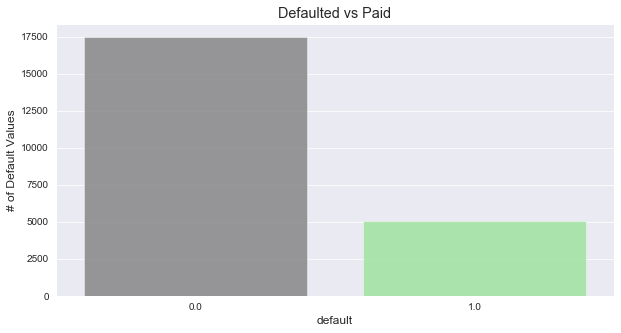

In [131]:
y = df['default']
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(y, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Defaulted vs Paid')
plt.ylabel('# of Default Values')
plt.show()

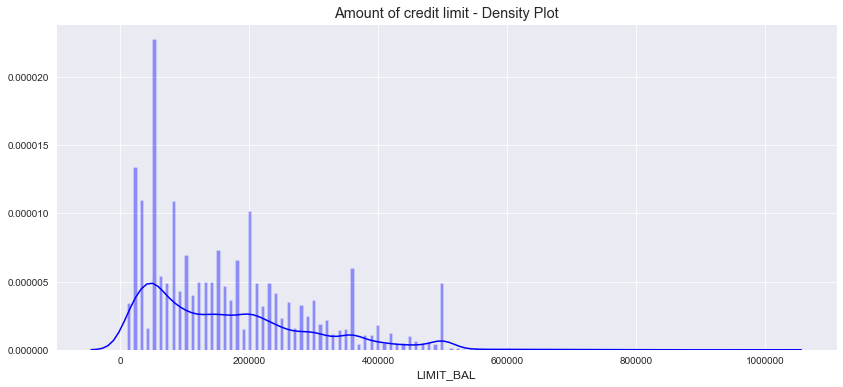

In [132]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

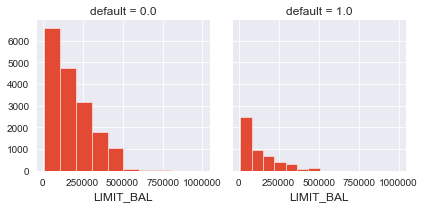

In [135]:
g = sns.FacetGrid(df, col = 'default')
g.map(plt.hist, 'LIMIT_BAL');

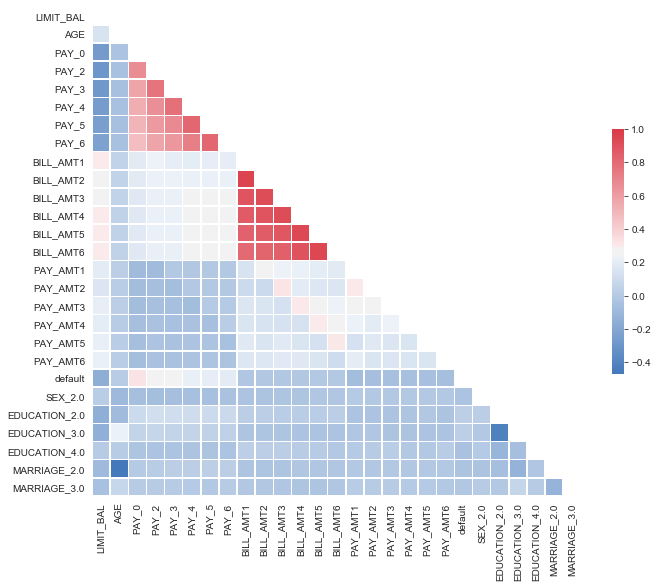

In [136]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

In [20]:
X_train.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0
count,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,...,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000
mean,167775.414190,35.466081,-0.012390,-0.130007,-0.165509,-0.219790,-0.261903,-0.291516,51735.933719,49627.906439,...,5351.550919,4745.181788,4887.825213,5212.061337,0.604811,0.467082,0.163398,0.015445,0.532141,0.011890
std,130141.545911,9.217541,1.121228,1.197512,1.194962,1.175001,1.143192,1.155905,75246.453977,72724.640828,...,19041.113678,15500.285748,15493.257629,17555.363726,0.488905,0.498929,0.369739,0.123319,0.498980,0.108392
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3490.500000,2900.000000,...,390.000000,270.000000,232.500000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22398.000000,21094.000000,...,1800.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66970.500000,63435.000000,...,4501.500000,4000.000000,4059.000000,4008.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1000000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,896040.000000,621000.000000,388071.000000,527143.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Accuracy: 0.5793333333333334
Training Accuracy score:  0.5793333333333334
Traning F1 score:  0.42826940501359106


C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


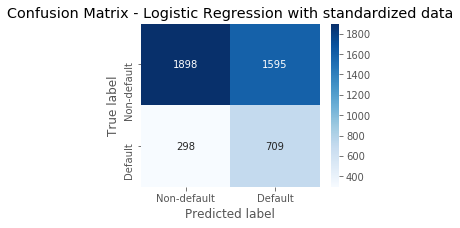

In [55]:
LRS = LogisticRegression(C=1, random_state=None, class_weight='balanced')
LRS.fit(X_train, y_train)
y_pred = LRS.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

print('Training Accuracy score: ', accuracy_score(y_test, y_pred))
# checking accuracy
print('Traning F1 score: ', f1_score(y_test, y_pred))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LRS.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

# Sampling

### Preparing sampling

In [51]:
training = pd.concat([X_train,y_train],axis=1)

not_defaulted = training[training.default==0]
defaulted = training[training.default==1]
print('not_defaulted count training: '+ str(len(not_defaulted)))
print('defaulted count training: '+ str(len(defaulted)))


not_defaulted count training: 13978
defaulted count training: 4021


### Downsampling Logistic Regression

In [24]:
from sklearn.utils import resample

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )

# downsample majority
not_default_downsampled = resample(not_defaulted, replace = False, # sample without replacement
                                        n_samples = len(defaulted), # match minority n
                                        random_state = 23) # reproducible results

downsampled = pd.concat([not_default_downsampled, defaulted])
downsampled.default.value_counts()

y_train_down = downsampled.default
X_train_down = downsampled.drop('default', axis=1)
downsampled_lr = LogisticRegression( solver='liblinear', class_weight='balanced')
downsampled_lr.fit(X_train_down, y_train_down)


downsampled_pred_test = downsampled_lr.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred_test))
print('Test F1 score: ', f1_score(y_test, downsampled_pred_test))

Test Accuracy score:  0.5528888888888889
Test F1 score:  0.42743312464428


In [38]:
downsampled.default.value_counts()

1.0    4021
0.0    4021
Name: default, dtype: int64

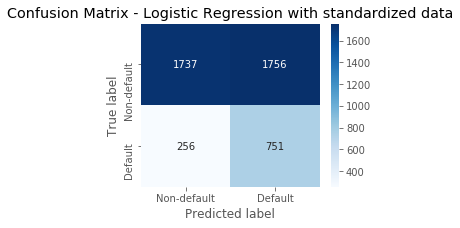

In [39]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,downsampled_lr.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

### Upsampling Logistic Regression

In [47]:
# upsample minority
default_upsampled = resample(defaulted, replace = True, # sample with replacement
                                        n_samples = len(not_defaulted), # match minority n
                                        random_state = 23) # reproducible results

upsampled = pd.concat([default_upsampled, not_defaulted])
upsampled.default.value_counts()

y_train_up = upsampled.default
X_train_up = upsampled.drop('default', axis=1)
upsampled_lr = LogisticRegression( solver='liblinear')
upsampled_lr.fit(X_train_up, y_train_up)


upsampled_pred_test = upsampled_lr.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred_test))
print('Test F1 score: ', f1_score(y_test, upsampled_pred_test))

Test Accuracy score:  0.5875555555555556
Test F1 score:  0.4423076923076923


In [48]:
upsampled.default.value_counts()

0.0    13978
1.0    13978
Name: default, dtype: int64

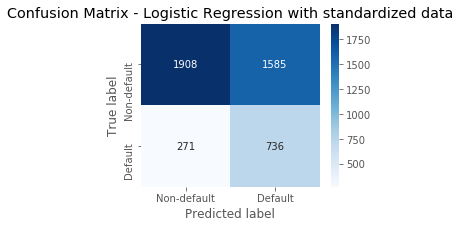

In [45]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,upsampled_lr.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

## Voting Classifer for logistic regression

#### F1 = .42

    didn't help increase F1

In [59]:
from sklearn.ensemble import VotingClassifier

In [56]:

C_param_range = [0.001,0.01,0.1,1,10]
titles = ['lr_0_001', 'lr_0_01', 'lr_0_1', 'lr_1', 'lr_10']

params = dict(zip(titles, C_param_range)) 
models = {}

table = pd.DataFrame(columns = ['C_parameter','F1'])
table['C_parameter'] = C_param_range
j = 0

for k , v  in params.items():
    
    # Create model using different value for c  
    lr = LogisticRegression(penalty = 'l2', C = v, random_state = 1, class_weight='balanced')
    
    #save the model to a dictionary to use later in our voting classifiers
    models[k]= lr
    
    #the steps below this point are unnecessary in order to create a voting classifier, 
    #but it is easy to fit the model and see how performance changes for different levels of regularization
    lr.fit(X_train, y_train)
    
    # Predict using model
    y_preds = lr.predict(X_test)

    # Saving accuracy score in table
    table.iloc[j,1] = metrics.f1_score(y_test, y_preds)
    j += 1



C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [63]:
table

,C_parameter,F1
0,0.001,0.419739
1,0.010,0.416817
2,0.100,0.422932
3,1.000,0.428269
4,10.000,0.422268


In [62]:
lr_voting = VotingClassifier(estimators=list(models.items()), 
                              voting='hard')

lr_voting.fit(X_train, y_train)

lrv_preds = lr_voting.predict(X_test)

lrv_f1 = metrics.f1_score(y_test, lrv_preds)

print(lrv_f1)

C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

0.421021200358316


C:\Users\All PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Bagging Classifier for Log Reg

##### F1 = .48

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(random_state = 1, class_weight='balanced'), 
            n_estimators= 100,
            max_samples= .7,
            max_features= 6,
            oob_score= True
                )

In [76]:
bc_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                    random_state=1),
                  max_features=6, max_samples=0.7, n_estimators=100,
                  oob_score=True)

In [77]:
bc_lr.oob_score_

0.7245958108783821

In [78]:

bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = metrics.f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

0.4844614729672201


### Random Forest Classifer 

##### F1 = .55

In [81]:
# Instantiate the classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
rfc = RandomForestClassifier(random_state=1, class_weight='balanced')

In [84]:
#create a dictionary of all the parameters you want to tune
param_grid = { 
    'n_estimators': [100,200],
    'max_depth': range(2,10,1),
    'max_features': [3,4,5,6],
    'criterion': ['gini', 'entropy'],
}

In [85]:
grid_tree=GridSearchCV(rfc, param_grid, cv=7, scoring='f1', verbose=2, n_jobs=-1)

In [86]:
grid_tree.fit(X_train,y_train)

Fitting 7 folds for each of 128 candidates, totalling 896 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 896 out of 896 | elapsed:  5.8min finished


GridSearchCV(cv=7,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [87]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5407048631146406
{'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       random_state=1)


##### Best Param for Forrest GridSearch
    0.5407048631146406
    {'criterion': 'gini', 'max_depth': 4, 'max_features': 5, 'n_estimators': 100}
    RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                           random_state=1)

In [100]:
#Predict the response for test dataset
test_preds = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("F1:",metrics.f1_score(y_test, test_preds))

F1: 0.5529075309818874


## 6. Model Evaluation

## 7. Final Model

### HOLDOUT

In [101]:
holdout = pd.read_csv('holdout_data.csv', index_col=0,)

In [102]:
holdout.reset_index(drop=True, inplace=True)

In [105]:
holdout.shape

(7501, 23)

In [106]:
holdout.rename(columns={"X1": "LIMIT_BAL", "X2": "SEX", "X3": "EDUCATION", "X4": "MARRIAGE", 
                   "X5": "AGE", "X6": "PAY_0", "X7": "PAY_2", "X8": "PAY_3", "X9": "PAY_4",
                   "X10": "PAY_5", "X11": "PAY_6", "X12": "BILL_AMT1", "X13": "BILL_AMT2",
                   "X14": "BILL_AMT3","X15": "BILL_AMT4",
                   "X16": "BILL_AMT5","X17": "BILL_AMT6","X18": "PAY_AMT1","X19": "PAY_AMT2",
                   "X20": "PAY_AMT3", "X21": "PAY_AMT4", "X22": "PAY_AMT5", "X23": "PAY_AMT6"},inplace=True)


In [108]:
holdout.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,180000,2,2,1,44,0,0,0,0,0,...,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
1,130000,2,2,1,48,-2,-2,-2,-2,-2,...,1487,1279,749,440,1240,1487,1279,749,440,849


In [109]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  7501 non-null   int64
 1   SEX        7501 non-null   int64
 2   EDUCATION  7501 non-null   int64
 3   MARRIAGE   7501 non-null   int64
 4   AGE        7501 non-null   int64
 5   PAY_0      7501 non-null   int64
 6   PAY_2      7501 non-null   int64
 7   PAY_3      7501 non-null   int64
 8   PAY_4      7501 non-null   int64
 9   PAY_5      7501 non-null   int64
 10  PAY_6      7501 non-null   int64
 11  BILL_AMT1  7501 non-null   int64
 12  BILL_AMT2  7501 non-null   int64
 13  BILL_AMT3  7501 non-null   int64
 14  BILL_AMT4  7501 non-null   int64
 15  BILL_AMT5  7501 non-null   int64
 16  BILL_AMT6  7501 non-null   int64
 17  PAY_AMT1   7501 non-null   int64
 18  PAY_AMT2   7501 non-null   int64
 19  PAY_AMT3   7501 non-null   int64
 20  PAY_AMT4   7501 non-null   int64
 21  PAY_AMT5   750

In [111]:
holdout['EDUCATION']=np.where(holdout['EDUCATION']>4,4,holdout['EDUCATION'])
holdout['EDUCATION']=np.where(holdout['EDUCATION']<1,4,holdout['EDUCATION'])

In [112]:
holdout['MARRIAGE']=np.where(holdout['MARRIAGE']<1,3,holdout['MARRIAGE'])

In [113]:
holdout = pd.get_dummies(holdout, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [114]:
gridtree_final = grid_tree.best_estimator_.predict(holdout)

In [115]:
gridtree_final

array([0., 0., 1., ..., 1., 0., 1.])

In [116]:
gridtree_final = gridtree_final.astype(int)

In [117]:
final_pred = pd.DataFrame(gridtree_final)

In [118]:
final_pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
7496,0
7497,0
7498,1
7499,0


In [119]:
# final_pred.to_csv('finalholdout_DR.csv')

In [121]:
final_pred.0.value_counts()

SyntaxError: invalid syntax (<ipython-input-121-aab5f183eb14>, line 1)

In [127]:
final_pred.rename(columns={0: "stuff"},inplace=True)

In [129]:
final_pred.stuff.value_counts()

0    5674
1    1827
Name: stuff, dtype: int64

In [128]:
final_pred

,stuff
0,0
1,0
2,1
3,0
4,1
...,...
7496,0
7497,0
7498,1
7499,0
